# Matched Beer Data

### Loading

In [30]:
import pandas as pd
import tarfile
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'data/matched_beer_data.tar.gz'
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='../data')  
    tar.list()

?rwxrwxrwx gayouf/gayouf   26775015 2017-08-10 17:15:37 ratings.csv 
?rw-rw-r-- gayouf/gayouf   99396732 2018-03-19 14:13:29 ratings_ba.txt.gz 
?rw-rw-r-- gayouf/gayouf  133634318 2018-03-19 14:22:54 ratings_rb.txt.gz 
?rwxrwxrwx gayouf/gayouf     533538 2017-08-08 15:35:54 users_approx.csv 
?rwxrwxrwx gayouf/gayouf     429785 2017-08-07 14:51:08 users.csv 
?rwxrwxrwx gayouf/gayouf   14246582 2018-03-19 14:26:49 beers.csv 
?rwxrwxrwx gayouf/gayouf    1045044 2017-08-02 18:10:05 breweries.csv 
?rw-rw-r-- gayouf/gayouf   77201217 2018-03-20 21:16:35 ratings_with_text_ba.txt.gz 
?rw-rw-r-- gayouf/gayouf  133632940 2018-03-20 21:25:56 ratings_with_text_rb.txt.gz 


In [4]:
ratings_merged = pd.read_csv('../data/ratings.csv')
ratings_ba = pd.read_csv('../data/ratings_ba.txt.gz', compression='gzip', delimiter='\t')
ratings_rb = pd.read_csv('../data/ratings_rb.txt.gz', compression='gzip', delimiter='\t')
users_approx = pd.read_csv('../data/users_approx.csv')
users_merged = pd.read_csv('../data/users.csv')
beers_merged = pd.read_csv('../data/beers.csv')
breweries_merged = pd.read_csv('../data/breweries.csv')
ratings_with_text_ba = pd.read_csv('../data/ratings_with_text_ba.txt.gz', compression='gzip', delimiter='\t')
ratings_with_text_rb = pd.read_csv('../data/ratings_with_text_rb.txt.gz', compression='gzip', delimiter='\t')

/var/folders/9b/th5400l94kqcyysbyv63p_bm0000gn/T/ipykernel_76888/1035119176.py:1: DtypeWarning: Columns (0,1,2,3,5,7,8,9,10,11,13,17,18,19,20,22,24,25,26,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings_merged = pd.read_csv('../data/ratings.csv')
/var/folders/9b/th5400l94kqcyysbyv63p_bm0000gn/T/ipykernel_76888/1035119176.py:6: DtypeWarning: Columns (0,1,2,3,4,5,8,10,11,12,13,15,16,17,18,19,20,23,25,26,27,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  beers_merged = pd.read_csv('../data/beers.csv')


## Countries analysis

#### For users

In [5]:
users_merged.head()

,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,rb,rb.1,rb.2,rb.3,rb.4,rb.5
0,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined,location,nbr_ratings,user_id,user_name,user_name_lower
1,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel
2,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138
3,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop
4,1322737200.0,Estonia,11,0,visionthing.639993,visionthing,visionthing,1242986400.0,Estonia,5462,91324,visionthing,visionthing


In [6]:
users_merged = users_merged.rename(columns={
    'ba': 'joined.0',
    'ba.1': 'location.0',
    'ba.2': 'nbr_ratings.0',
    'ba.3': 'nbr_reviews.0',
    'ba.4': 'user_id.0',
    'ba.5': 'user_name.0',
    'ba.6': 'user_name_lower.0',
    'rb': 'joined.1',
    'rb.1': 'location.1',
    'rb.2': 'nbr_ratings.1',
    'rb.3': 'nbr_reviews.1',
    'rb.4': 'user_id.1',
    'rb.5': 'user_name.1'
})

In [7]:
users_merged = users_merged.drop(index=0).reset_index(drop=True) # remove the first row containing the previous column name
users_merged.head()

,joined.0,location.0,nbr_ratings.0,nbr_reviews.0,user_id.0,user_name.0,user_name_lower.0,joined.1,location.1,nbr_ratings.1,nbr_reviews.1,user_id.1,user_name.1
0,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel
1,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138
2,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop
3,1322737200.0,Estonia,11,0,visionthing.639993,visionthing,visionthing,1242986400.0,Estonia,5462,91324,visionthing,visionthing
4,1432116000.0,England,1,0,lazypyro.989356,LazyPyro,lazypyro,1431165600.0,England,1096,368991,LazyPyro,lazypyro


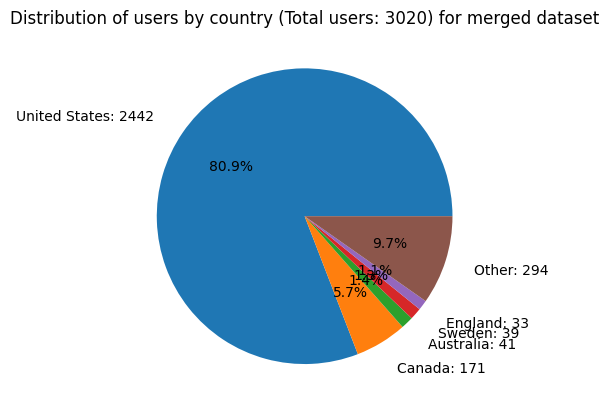

In [8]:
# Remove the states to only have the countries
users_merged['country'] = users_merged['location.0'].str.split(',').str[0]

# Compute the number of users in the top 5 countries
top5_countries = users_merged['country'].value_counts().nlargest(5)

# Compute the sum of the remaining countries
other_countries_count = users_merged['country'].value_counts().sum() - top5_countries.sum()

# Add the other countries count
top_countries = pd.concat([top5_countries, pd.Series({'Other': other_countries_count})])

# Calculate percentages for each country in top_countries
total_users = users_merged['country'].value_counts().sum()
top_countries_percent = (top_countries / total_users * 100).round(1)

# Create labels with country name, count, and percentage
top_countries_labels = [f"{country}: {count} " for country, count in zip(top_countries.index, top_countries)]

top_countries.plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=top_countries_labels,
    labeldistance=1.2,       # Controls the position of the label
)
plt.title(f'Distribution of users by country (Total users: {total_users}) for merged dataset')
plt.ylabel('') 
plt.show()

In [10]:
top5_countries

country
United States    2442
Canada            171
Australia          41
Sweden             39
England            33
Name: count, dtype: int64

For the merged dataset : 80.8% of the users originate from the United States, in particularly there are 2442 users from this country.


#### Number of ratings per country


In [11]:
# Convert number of ratings values in numeric
users_merged['nbr_ratings.1'] = pd.to_numeric(users_merged['nbr_ratings.1'], errors='coerce')
users_merged['nbr_ratings.0'] = pd.to_numeric(users_merged['nbr_ratings.0'], errors='coerce')

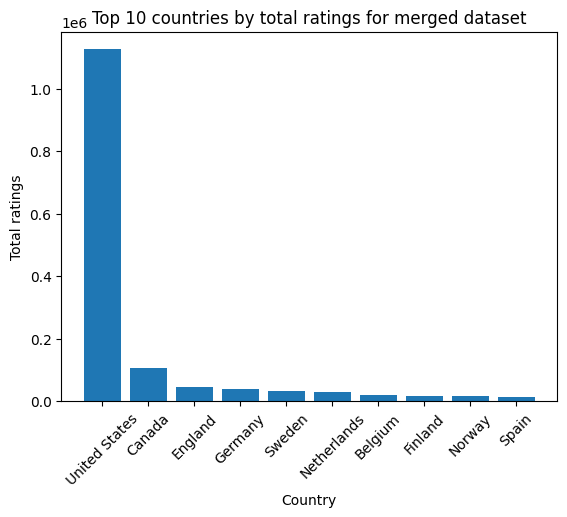

In [12]:
# Compute the sum of the number of ratings from the two website
users_merged['total_ratings'] = users_merged['nbr_ratings.0'] + users_merged['nbr_ratings.1']

# Regroup the number of ratings by countries
country_ratings = users_merged.groupby('country')['total_ratings'].sum().reset_index()

# Get the top 10 countries
top_countries = country_ratings.nlargest(10, 'total_ratings')

# Bar plot
plt.bar(top_countries['country'], top_countries['total_ratings'])
plt.xlabel('Country')
plt.ylabel('Total ratings')
plt.title('Top 10 countries by total ratings for merged dataset')
plt.xticks(rotation=45)
plt.show()

# Beer Advocate

### Loading

In [13]:
file_path = 'data/BeerAdvocate.tar.gz'
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='../data')  
    tar.list()

?rwxrwxrwx gayouf/gayouf   29617210 2017-10-27 18:01:43 beers.csv 
?rwxrwxrwx gayouf/gayouf  729167813 2017-08-03 14:28:54 reviews.txt.gz 
?rwxrwxrwx gayouf/gayouf    9751813 2017-08-07 13:23:35 users.csv 
?rwxrwxrwx gayouf/gayouf     808192 2017-08-04 18:22:30 breweries.csv 
?rwxrwxr-x gayouf/gayouf  926302646 2017-08-03 14:29:24 ratings.txt.gz 


In [15]:
beers_ba = pd.read_csv('../data/beers.csv')
reviews_ba = pd.read_csv('../data/reviews.txt.gz', delimiter='\t', on_bad_lines='skip')
users_ba = pd.read_csv('../data/users.csv')
breweries_ba = pd.read_csv('../data/breweries.csv')
ratings_ba = pd.read_csv('../data/ratings.txt.gz', delimiter='\t', on_bad_lines='skip')

In [16]:
users_ba

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


In [17]:
users_ba = users_ba.drop_duplicates(subset=['user_name']) # make sure there are no duplicates in user names
users_ba

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


## Country analysis


#### For users

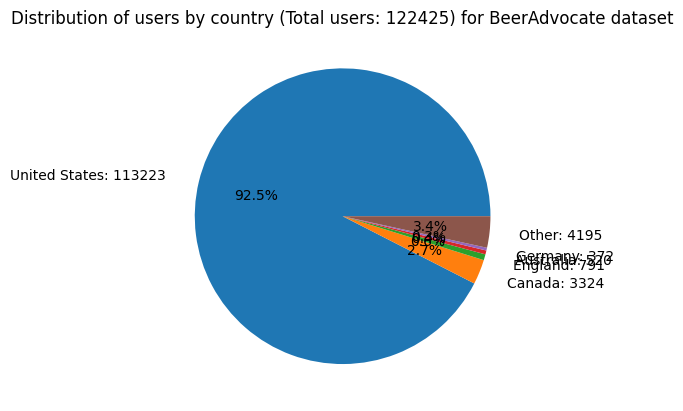

In [18]:
# Remove the states to only have the countries
users_ba['country'] = users_ba['location'].str.split(',').str[0]

# Compute the number of users in the top 5 countries
top5_countries = users_ba['country'].value_counts().nlargest(5)

# Compute the sum of the remaining countries
other_countries_count = users_ba['country'].value_counts().sum() - top5_countries.sum()

# Add the other countries count
top_countries = pd.concat([top5_countries, pd.Series({'Other': other_countries_count})])

# Calculate percentages for each country in top_countries
total_users = users_ba['country'].value_counts().sum()
top_countries_percent_ba = (top_countries / total_users * 100).round(1)

# Create labels with country name, count, and percentage
top_countries_labels = [f"{country}: {count} " for country, count in zip(top_countries.index, top_countries)]

top_countries.plot(
    kind='pie',
    labels=top_countries_labels,
    autopct='%1.1f%%',
    labeldistance=1.2,       # Controls the position of the label
)
plt.title(f'Distribution of users by country (Total users: {total_users}) for BeerAdvocate dataset')
plt.ylabel('') 
plt.show()

In [19]:
top5_countries

country
United States    113223
Canada             3324
England             791
Australia           520
Germany             372
Name: count, dtype: int64

For BeerAdvocates: 92.5% of users originate from United States, precisely 113'223 users. 

#### Number of ratings per country

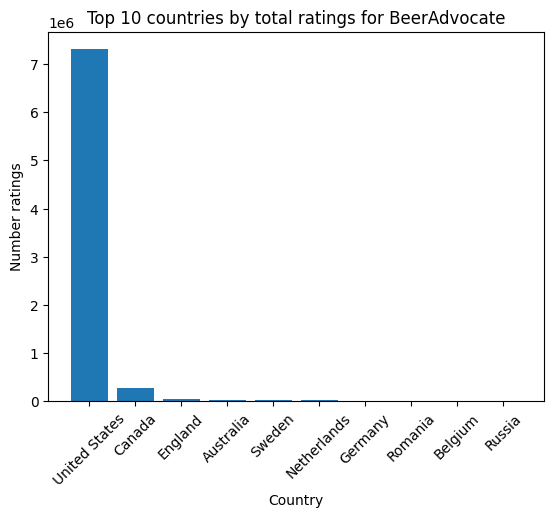

In [20]:
# Convert number of ratings values in numeric
users_ba['nbr_ratings'] = pd.to_numeric(users_ba['nbr_ratings'], errors='coerce')

# Regroup the number of ratings by countries
country_ratings = users_ba.groupby('country')['nbr_ratings'].sum().reset_index()

# Get the top 10 countries
top_countries = country_ratings.nlargest(10, 'nbr_ratings')

# Bar plot
plt.bar(top_countries['country'], top_countries['nbr_ratings'])
plt.xlabel('Country')
plt.ylabel('Number ratings')
plt.title('Top 10 countries by total ratings for BeerAdvocate')
plt.xticks(rotation=45)
plt.show()

### States analysis


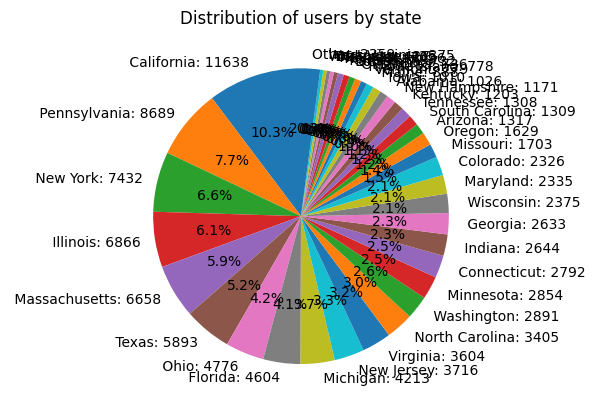

In [23]:
# keep only the states
users_ba['states'] = users_ba['location'].str.split(',').str[1]

top_states = users_ba['states'].value_counts().nlargest(40)
other_states_count = users_ba['states'].value_counts().sum() - top_states.sum()
top_states = pd.concat([top_states, pd.Series({'Other': other_states_count})])

state_labels = [f"{state}: {count}" for state, count in zip(top_states.index, top_states)]

top_states.plot(kind='pie', labels=state_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of users by state')
plt.ylabel('') 
plt.show()

# RateBeer


### Loading

In [24]:
file_path = 'data/RateBeer.tar.gz'
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='../data')
    tar.list()

?rwxrwxrwx gayouf/gayouf   47204946 2017-10-27 18:02:52 beers.csv 
?rwxrwxr-x gayouf/gayouf  926392900 2017-08-03 19:55:50 reviews.txt.gz 
?rwxrwxrwx gayouf/gayouf    3202831 2017-08-07 13:16:07 users.csv 
?rwxrwxrwx gayouf/gayouf    1038205 2017-08-03 19:54:31 breweries.csv 
?rwxrwxr-x gayouf/gayouf  926392900 2017-08-03 19:55:50 ratings.txt.gz 


In [26]:
beers_rb = pd.read_csv('../data/beers.csv')
reviews_rb = pd.read_csv('../data/reviews.txt.gz', delimiter='\t', on_bad_lines='skip')
users_rb = pd.read_csv('../data/users.csv')
breweries_rb = pd.read_csv('../data/breweries.csv')
ratings_rb = pd.read_csv('../data/ratings.txt.gz', delimiter='\t', on_bad_lines='skip')

In [27]:
users_rb

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


In [28]:
users_rb = users_rb.drop_duplicates(subset=['user_name']) # make sure there are no duplicates in user names
users_rb

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


## Country analysis

#### For users

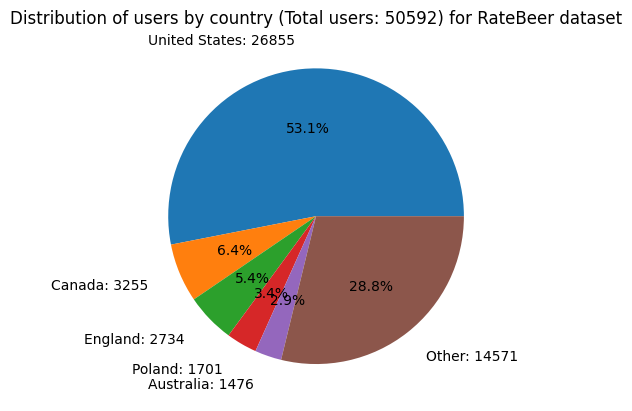

In [29]:
# Remove the states to only have the countries
users_rb['country'] = users_rb['location'].str.split(',').str[0]

# Compute the number of users in the top 5 countries
top5_countries = users_rb['country'].value_counts().nlargest(5)

# Compute the sum of the remaining countries
other_countries_count = users_rb['country'].value_counts().sum() - top5_countries.sum()

# Add the other countries count
top_countries = pd.concat([top5_countries, pd.Series({'Other': other_countries_count})])

# Calculate percentages for each country in top_countries
total_users = users_rb['country'].value_counts().sum()
top_countries_percent_rb = (top_countries / total_users * 100).round(1)

# Create labels with country name, count, and percentage
top_countries_labels = [f"{country}: {count} " for country, count in zip(top_countries.index, top_countries)]

top_countries.plot(
    kind='pie',
    labels=top_countries_labels,
    autopct='%1.1f%%',
    labeldistance=1.2,       # Controls the position of the label
)
plt.title(f'Distribution of users by country (Total users: {total_users}) for RateBeer dataset')
plt.ylabel('') 
plt.show()

In [30]:
top5_countries

country
United States    26855
Canada            3255
England           2734
Poland            1701
Australia         1476
Name: count, dtype: int64

#### Number of ratings per country

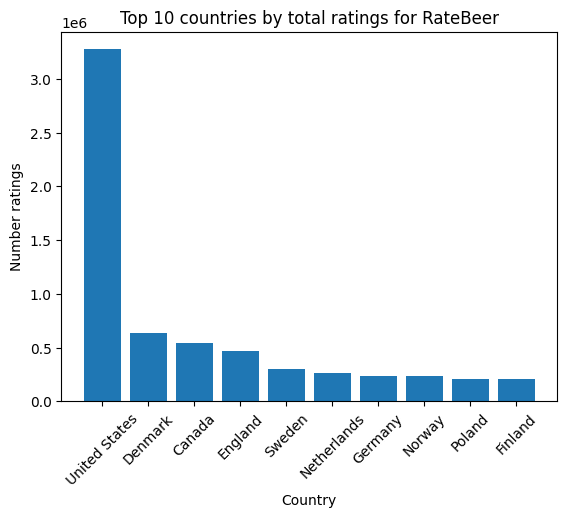

In [31]:
# Convert number of ratings values in numeric
users_rb['nbr_ratings'] = pd.to_numeric(users_rb['nbr_ratings'], errors='coerce')

# Regroup the number of ratings by countries
country_ratings = users_rb.groupby('country')['nbr_ratings'].sum().reset_index()

# Get the top 10 countries
top_countries = country_ratings.nlargest(10, 'nbr_ratings')

# Bar plot
plt.bar(top_countries['country'], top_countries['nbr_ratings'])
plt.xlabel('Country')
plt.ylabel('Number ratings')
plt.title('Top 10 countries by total ratings for RateBeer')
plt.xticks(rotation=45)
plt.show()

## Only focusing on BeerAdocate

### Loading

In [3]:
file_path = 'data/BeerAdvocate.tar.gz'
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='../data')  
    tar.list()

?rwxrwxrwx gayouf/gayouf   29617210 2017-10-27 18:01:43 beers.csv 
?rwxrwxrwx gayouf/gayouf  729167813 2017-08-03 14:28:54 reviews.txt.gz 
?rwxrwxrwx gayouf/gayouf    9751813 2017-08-07 13:23:35 users.csv 
?rwxrwxrwx gayouf/gayouf     808192 2017-08-04 18:22:30 breweries.csv 
?rwxrwxr-x gayouf/gayouf  926302646 2017-08-03 14:29:24 ratings.txt.gz 


In [4]:
beers_ba = pd.read_csv('../data/beers.csv')
reviews_ba = pd.read_csv('../data/reviews.txt.gz', header=None, names=["info"], delimiter='\t', on_bad_lines='skip')
users_ba = pd.read_csv('../data/users.csv')
breweries_ba = pd.read_csv('../data/breweries.csv')
ratings_ba = pd.read_csv('../data/ratings.txt.gz', delimiter='\t', on_bad_lines='skip')

### Reviews analysis

In [5]:
reviews_ba.head(20)

,info
0,beer_name: Régab
1,beer_id: 142544
2,brewery_name: Societe des Brasseries du Gabon ...
3,brewery_id: 37262
4,style: Euro Pale Lager
5,abv: 4.5
6,date: 1440064800
7,user_name: nmann08
8,user_id: nmann08.184925
9,appearance: 3.25


There are 2'589'586 reviews, and 16 features (user_name, rating, aroma, ...)

In [12]:
# Add review_id based on 16-row structure 
reviews_ba['review_id'] = reviews_ba.index // 16

# Split key-value pairs and filter valid splits
split_data = reviews_ba['info'].str.split(': ', n=1, expand=True)
split_data = split_data[split_data[1].notna()]  # Remove rows with no :

# Assign key and value columns
reviews_ba[['key', 'value']] = split_data

# Pivot the table to convert key to a column
reviews_ba_pivot = reviews_ba.pivot(index='review_id', columns='key', values='value').reset_index(drop=True)

# 7 min 46s to run

In [19]:
reviews_ba.head(5)

,info,review_id,key,value
0,beer_name: Régab,0,beer_name,Régab
1,beer_id: 142544,0,beer_id,142544
2,brewery_name: Societe des Brasseries du Gabon ...,0,brewery_name,Societe des Brasseries du Gabon (SOBRAGA)
3,brewery_id: 37262,0,brewery_id,37262
4,style: Euro Pale Lager,0,style,Euro Pale Lager


In [17]:
reviews_ba_pivot.head(5)

key,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,style,taste,text,user_id,user_name,year,month,day
0,4.5,3.25,2.75,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),2015-08-20 10:00:00,3.0,3.25,2.88,Euro Pale Lager,2.75,"From a bottle, pours a piss yellow color with ...",nmann08.184925,nmann08,2015,8,20
1,4.5,3.0,3.5,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,2009-02-20 11:00:00,3.5,3.5,3.67,English Pale Ale,4.0,Pours pale copper with a thin head that quickl...,stjamesgate.163714,StJamesGate,2009,2,20
2,4.5,4.0,3.5,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,2006-03-13 11:00:00,3.5,3.5,3.73,English Pale Ale,4.0,"500ml Bottle bought from The Vintage, Antrim.....",mdagnew.19527,mdagnew,2006,3,13
3,4.5,4.0,3.5,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,2004-12-01 11:00:00,4.5,4.0,3.98,English Pale Ale,4.0,Serving: 500ml brown bottlePour: Good head wit...,helloloser12345.10867,helloloser12345,2004,12,1
4,4.5,4.0,4.0,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,2004-08-30 10:00:00,4.0,4.0,4.00,English Pale Ale,4.0,"500ml bottlePours with a light, slightly hazy ...",cypressbob.3708,cypressbob,2004,8,30


In [28]:
# Convert the date from Unix timestamp 
reviews_ba_pivot['date'] = pd.to_datetime(reviews_ba_pivot['date'].astype(int), unit='s')
reviews_ba_pivot['year'] = reviews_ba_pivot['date'].dt.year
reviews_ba_pivot['month'] = reviews_ba_pivot['date'].dt.month
reviews_ba_pivot['day'] = reviews_ba_pivot['date'].dt.day

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 45633838850-01-23 16:00:00


- Spring months : March, April, March
- Summer months : June, July, August
- Fall months : September, October, November
- Winter months : December, January, February


In [23]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    elif month in [12, 1, 2]:
        return 'Winter'

In [31]:
reviews_ba_pivot['season'] = reviews_ba_pivot['month'].apply(get_season)

In [43]:
# Join reviews_ba_pilot to users_ba on "user_id"
reviews_ba_pivot = reviews_ba_pivot.merge(users_ba[['user_id', 'location']], on='user_id', how='left')

In [53]:
# Remove the states to only have the countries
reviews_ba_pivot['country'] = reviews_ba_pivot['location'].str.split(',').str[0]

# Remove the countries to only have the states
reviews_ba_pivot['states'] = reviews_ba_pivot['location'].str.split(',').str[1]

### Yearly analysis

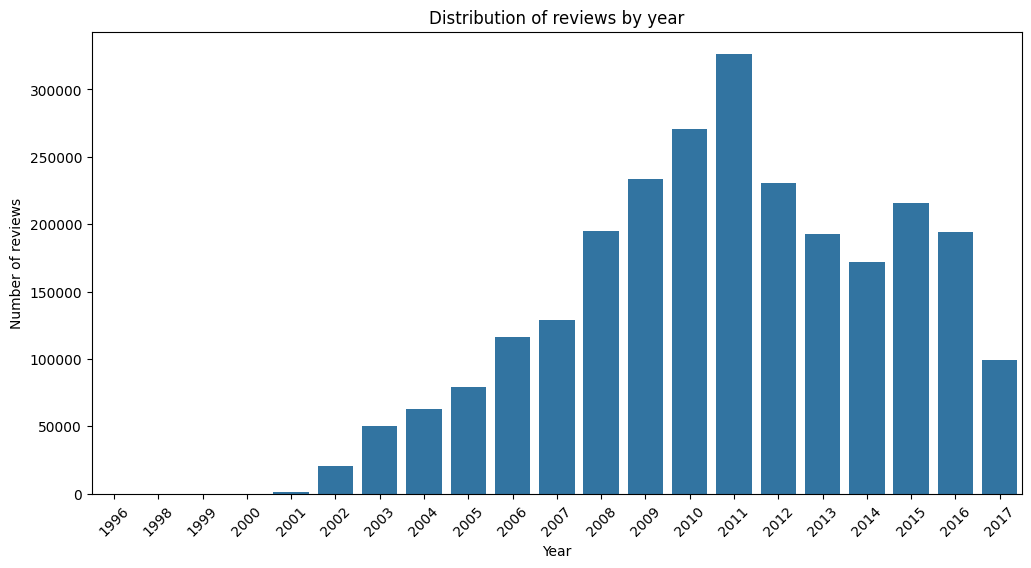

In [34]:
# Plot yearly review counts
plt.figure(figsize=(12, 6))
sns.countplot(data=reviews_ba_pivot, x='year', legend=False)
plt.title('Distribution of reviews by year')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.xticks(rotation=45)
plt.show()

2011 is the year with the most reviews

In [54]:
# Calculate total reviews per year
yearly_counts = reviews_ba_pivot.groupby('year').size().reset_index(name='total_reviews')

# Calculate the number of reviews from the United States per year
us_counts = reviews_ba_pivot[reviews_ba_pivot['country'] == 'United States'].groupby('year').size().reset_index(name='us_reviews')

# Merge
yearly_counts = yearly_counts.merge(us_counts, on='year', how='left')
yearly_counts['us_reviews'] = yearly_counts['us_reviews'].fillna(0)

# Calculate non-US reviews
yearly_counts['non_us_reviews'] = yearly_counts['total_reviews'] - yearly_counts['us_reviews']


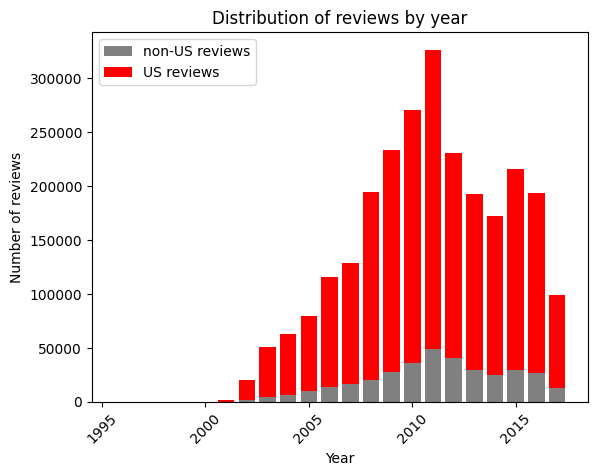

In [56]:
plt.bar(yearly_counts['year'], yearly_counts['non_us_reviews'], color='grey', label='non-US reviews')
plt.bar(yearly_counts['year'], yearly_counts['us_reviews'], bottom=yearly_counts['non_us_reviews'], color='red', label='US reviews')

plt.title('Distribution of reviews by year')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.xticks(rotation=45)
plt.legend()

plt.show()

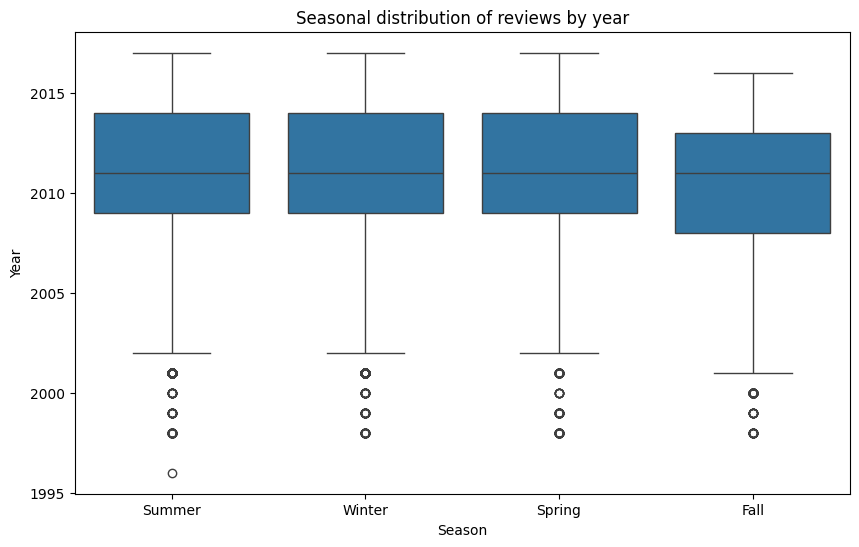

In [36]:
# Plot seasonal distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=reviews_ba_pivot, x='season', y='year', legend=False)
plt.title('Seasonal distribution of reviews by year')
plt.xlabel('Season')
plt.ylabel('Year')
plt.show()

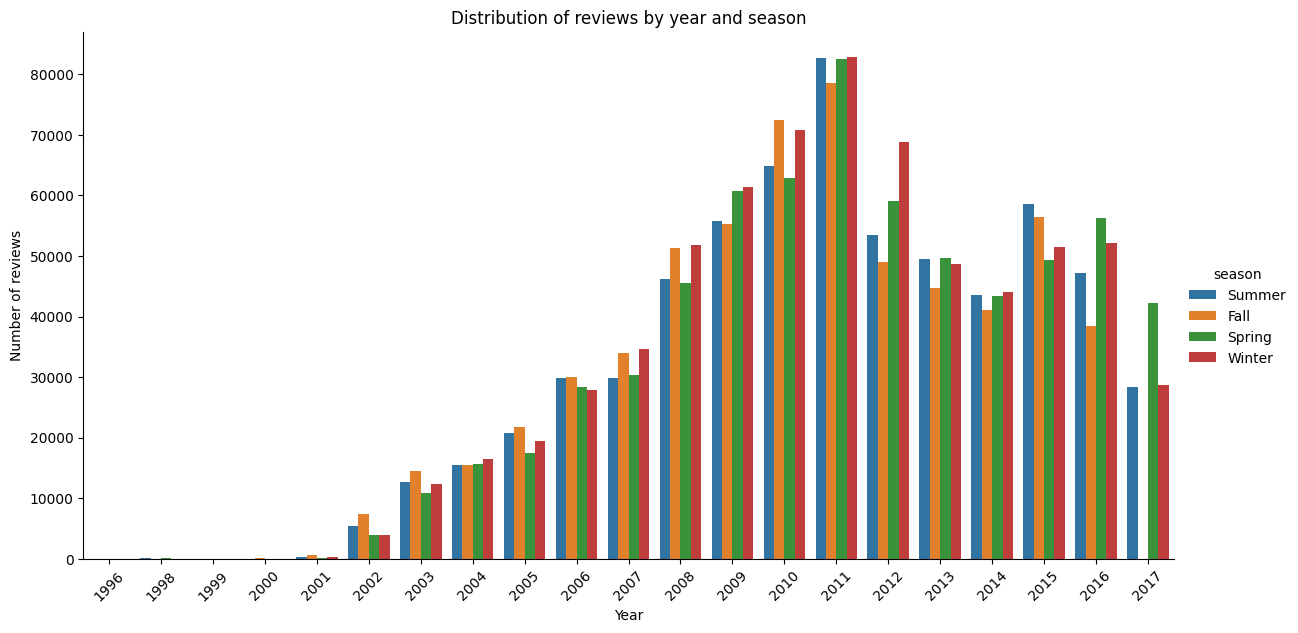

In [38]:
# Combined plot by year and season
sns.catplot(data=reviews_ba_pivot, x='year', hue='season', kind='count', height=6, aspect=2, legend=True)
plt.title('Distribution of reviews by year and season')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.xticks(rotation=45)
plt.show()

### Focusing only on United State

In [59]:
us_reviews = reviews_ba_pivot[reviews_ba_pivot['country'] == 'United States']

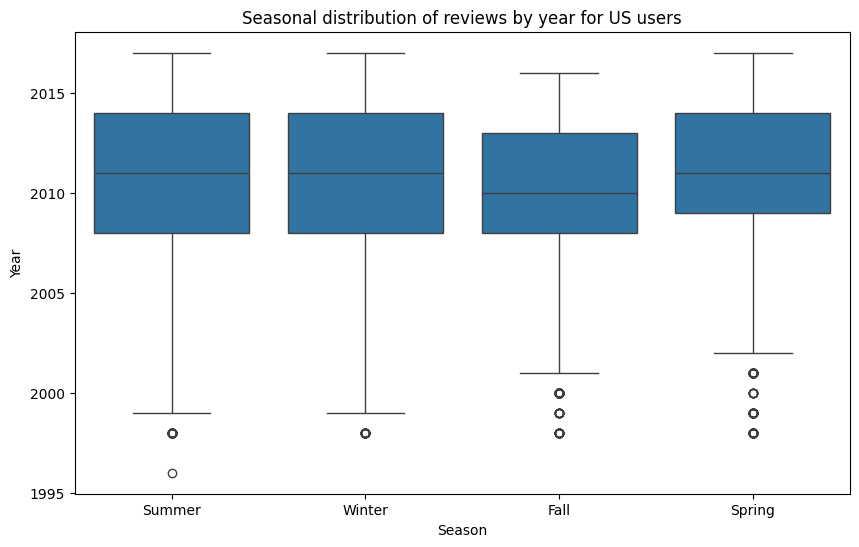

In [60]:
# Plot seasonal distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=us_reviews, x='season', y='year', legend=False)
plt.title('Seasonal distribution of reviews by year for US users')
plt.xlabel('Season')
plt.ylabel('Year')
plt.show()

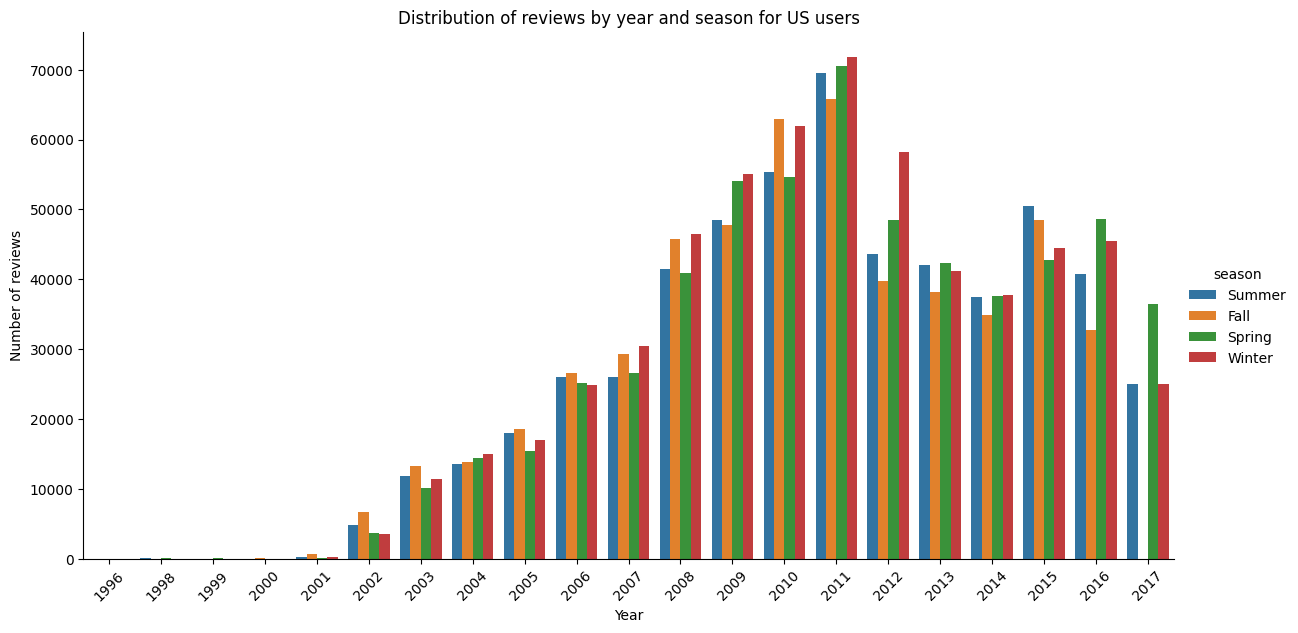

In [61]:
# Combined plot by year and season
sns.catplot(data=us_reviews, x='year', hue='season', kind='count', height=6, aspect=2, legend=True)
plt.title('Distribution of reviews by year and season for US users')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.xticks(rotation=45)
plt.show()

#### Focusing on 2011

In [62]:
us_reviews_2011 = us_reviews[us_reviews['year'] == 2011]

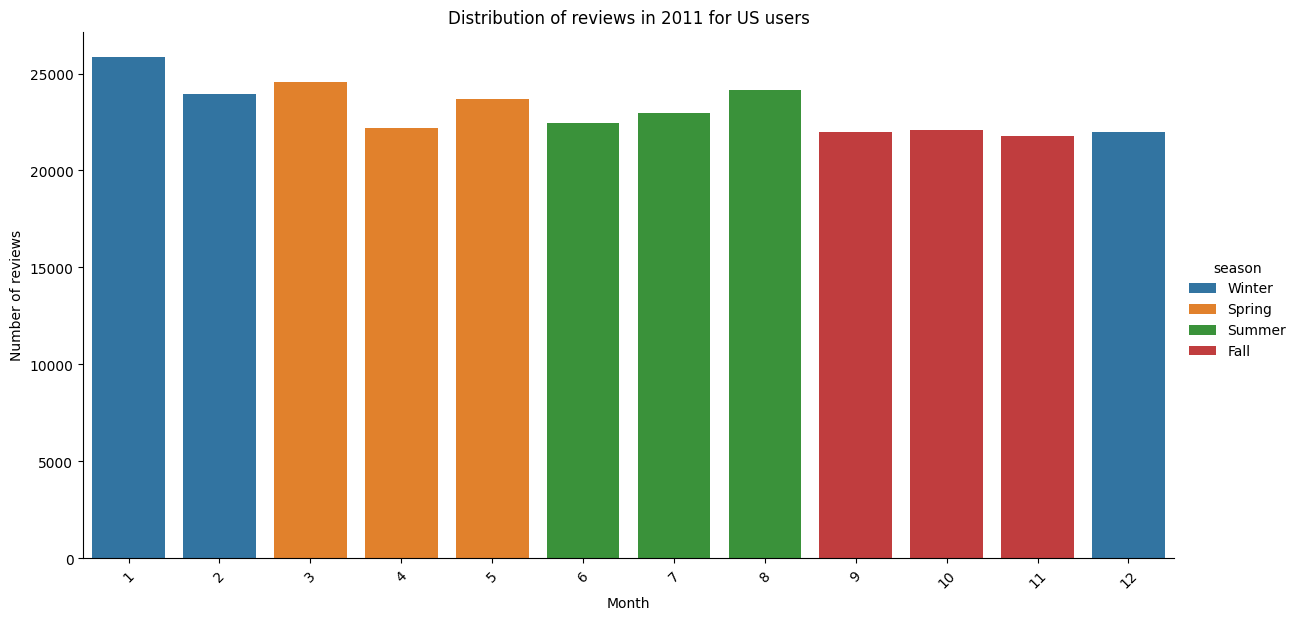

In [63]:
sns.catplot(data=us_reviews_2011, x='month', hue='season', kind='count', height=6, aspect=2, legend=True)
plt.title('Distribution of reviews in 2011 for US users')
plt.xlabel('Month')
plt.ylabel('Number of reviews')
plt.xticks(rotation=45)
plt.show()